In [4]:
from GAMcalc import *
import propagator 
import wignerD as wd

## Sets of Ks

In [5]:
def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2

    Ks = [k1, k2, k3]
    return Ks

def set4Ks(K):
    k1=np.array([0,0,1])*K
    k2=np.array([0,0,1])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

## Simple examples

In [ ]:
N = 10
FA = 0.5
K = 10
CHI = 0

pset=propagator.prop_set(nlam=10)
wigset = wd.wigner_d_vals()

KS = spinodal(pset, N, FA)
Ks3 = set3Ks(KS)
Ks4 = set4Ks(KS)

print(gamma2(pset, N, FA, K, CHI))
print(gamma3(pset, N, FA, Ks3))
print(gamma4(pset, wigset, N, FA, Ks4))

## Gamma2

In [6]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

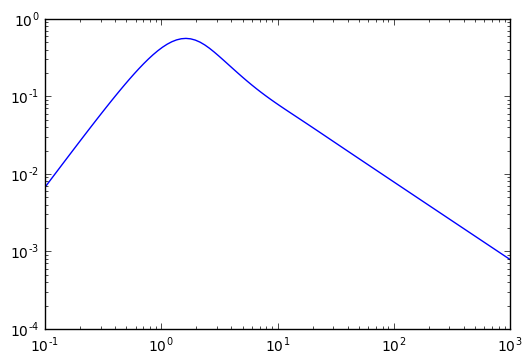

In [7]:
plt.loglog(KV, 1/gam2.real)
plt.show()

In [8]:
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(pset, N, FA)

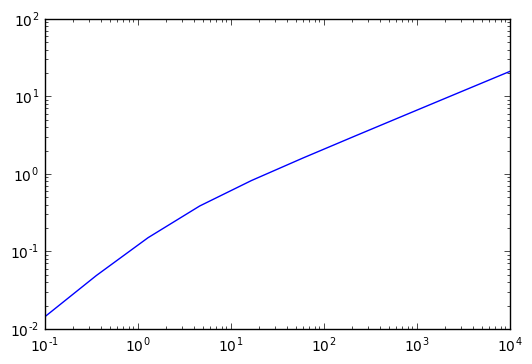

In [9]:
plt.loglog(NV, 1/KSV)
plt.show()

## Gamma3

In [13]:
FAV = np.linspace(.2, .5, 21)
pset=propagator.prop_set(nlam=10)

N = 100
GAM3N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N100[ind] = gamma3(pset, N, FA, Ks)*N
    
N = 1
GAM3N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1[ind] = gamma3(pset, N, FA, Ks)*N

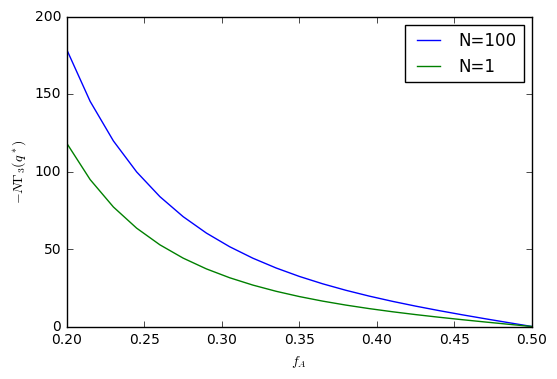

In [19]:
plt.plot(FAV, -GAM3N_N100.real, label='N=100')
plt.plot(FAV, -GAM3N_N1.real, label='N=1')
plt.xlabel('$f_A$')
plt.ylabel('$-N\Gamma_{3}(q^*)$')
plt.legend(loc=1)
plt.axis([.2,.5,0,200])
plt.show()

## Gamma4

In [ ]:
FAV = np.linspace(.3, .5, 21)
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 100
GAM4N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    print(ind)
    Ks = set4Ks(spinodal(pset, N, FA))
    GAM4N_N100[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    
N = 1
GAM4N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks(spinodal(pset, N, FA))
    GAM4N_N1[ind] = gamma4(pset, wigset, N, FA, Ks)*N

0
1
2
3
4
5
6


In [ ]:
plt.plot(FAV, GAM4N_N100)
plt.axis([.3,.5,100,500])
plt.box
plt.show()